In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_Panel|column_description'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

Toggle code

var_type (8079, 14)
Wall time: 16.8 s


In [ ]:
# 1/ Values of Welsh Lib Dem voters in GEs from 2010-19. Would that be possible or is sample size too small?

# 2/ Maybe voter values in the top 50 Lib Dems 2024 targets. Seats available here: 

In [62]:
EverVotedLD05_19 = (pan_dataset_votes[["2005GEVote_simple","2010GEVote_simple","2015GEVote_simple","2017GEVote_simple","2019GEVote_simple",]]=="LD").any(axis=1)
EverVotedLD05_19.sum()
# just under 1/4 sample

23027

In [63]:
EverLivedInWales14_19=(BES_Panel[match(BES_Panel,"countryW\d+").index]=="Wales").any(axis=1)
EverLivedInWales14_19.sum()
# just over 1/13 sample

7130

In [64]:
(EverVotedLD05_19 & EverLivedInWales14_19).sum()

# 1/62 of the sample!

1569

In [68]:
1.568/97

0.016164948453608247

In [69]:
1/.016

62.5

In [2]:
df = pd.read_excel("C:\\Users\\Marios\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\parliamentary constituency data\\BES-2019-General-Election-results-file-v1.0.xlsx")

In [17]:
df = df.set_index("ConstituencyName")

In [18]:
df[ "LD19" ]

ConstituencyName
Aberavon                              3.392620
Aberconwy                             5.714734
Aberdeen North                        7.606982
Aberdeen South                       10.995223
West Aberdeenshire and Kincardine    11.721810
                                       ...    
Yeovil                               31.061422
Ynys M�n                                   NaN
York Central                          8.380972
York Outer                           18.053371
East Yorkshire                        7.995225
Name: LD19, Length: 632, dtype: float64

In [23]:
df["Winner19"].value_counts()

Conservative               365
Labour                     202
Scottish National Party     48
Liberal Democrat            11
Plaid Cymru                  4
Speaker                      1
Green                        1
Name: Winner19, dtype: int64

In [29]:
# df.columns[6:15]
party_vote_share_cols = ['Con19', 'Lab19', 'LD19', 'SNP19', 'PC19', 'UKIP19', 'Green19',
       'Brexit19', 'Other19']

In [82]:
LD_margin = (df[ party_vote_share_cols ].max(axis=1) - df[ "LD19" ])
LD_margin.loc[df["Winner19"]=="Liberal Democrat"] = -df.loc[df["Winner19"]=="Liberal Democrat","Majority19"]
df["LD_margin"] = LD_margin
df["LD_margin_abs"] = LD_margin.abs()
LDbattleground = df.sort_values(by="LD_margin_abs").copy()
LDbattleground.round(2).head(40)[["Region","ConstituencyType","Winner19","Con19","Lab19","LD19","SNP19",'PC19', 'UKIP19', 'Green19',
       'Brexit19', 'Other19',"LD_margin","LD17"]]
# LD_margin.sort_values().head(50)

,Region,ConstituencyType,Winner19,Con19,Lab19,LD19,SNP19,PC19,UKIP19,Green19,Brexit19,Other19,LD_margin,LD17
ConstituencyName,,,,,,,,,,,,,,
East Dunbartonshire,Scotland,County,Scottish National Party,14.06,9.12,36.81,37.10,NaN,0.39,1.73,NaN,0.79,0.28,40.58
"Caithness, Sutherland and Easter Ross",Scotland,County,Liberal Democrat,16.45,6.15,37.21,36.56,NaN,NaN,NaN,3.62,0.00,-0.65,35.79
Wimbledon,London,Borough,Conservative,38.42,23.65,37.24,NaN,NaN,NaN,NaN,NaN,0.69,1.18,14.50
"Sheffield, Hallam",Yorkshire and The Humber,County,Labour,25.83,34.65,33.40,NaN,NaN,0.30,2.87,2.75,0.22,1.25,34.65
Carshalton and Wallington,London,Borough,Conservative,42.41,12.39,41.13,NaN,NaN,NaN,1.55,2.12,0.41,1.28,41.02
Cheltenham,South West,Borough,Conservative,47.99,4.92,46.34,NaN,NaN,NaN,NaN,NaN,0.75,1.65,42.18
Winchester,South East,County,Conservative,48.28,4.62,46.60,NaN,NaN,NaN,NaN,NaN,0.50,1.67,34.52
North East Fife,Scotland,County,Liberal Democrat,12.99,3.72,43.08,40.21,NaN,NaN,NaN,NaN,0.00,-2.87,32.86
Westmorland and Lonsdale,North West,County,Liberal Democrat,45.27,4.35,48.94,NaN,NaN,NaN,NaN,1.45,0.00,-3.67,45.83


In [ ]:
# Guildford - why wasn't Anne Milton part of the LD stand down alongside other breakaway Tories?
# She kept hold of 8%, which was bigger than the maj the Tories won by

# 5 seats head to head with SNP in Scotland (4 LD held, 1 SNP held)
# 2 seats in Wales - Brecon and Radnorshire vs Conservatives (17%), Ceredigion** 3rd place vs Plaid Cymru

# 2 seats held by Labour Sheffield, Hallam v close, Cambridge** token opposition

# whole bunch of seats that just look like spite/co-ordination failure
# -> any seat taken by the Conservatives where *both* Labour and Lib Dems are on 20+%

# HARD SPITE FIGHTS (LD and LAB >20%, CONS WIN)
# Wimbledon
# Cities of London and Westminster
# Finchley and Golders Green
# Kensington (prob also **)

# SOFT SPITE FIGHTS (CON majority <10%, LAB >10%)
# Hitchin and Harpenden
# Hazel Grove



# ** Not sensibly viewed as a LD 'battleground' constituency

In [84]:
LDbattleground[(LDbattleground["Winner19"]=="Conservative") &\
               (LDbattleground["Lab19"]>20) &\
               (LDbattleground["LD19"]>20) ]

,pano,ONSConstID,Country,Region,ConstituencyType,Winner19,Con19,Lab19,LD19,SNP19,...,c11NoAdultsEmployed,c11NoAdultsEmployedChildren,c11NoAdultsEmployedNoChildren,c11DeprivedNone,c11Deprived1,c11Deprived2,c11Deprived3,c11Deprived4,LD_margin,LD_margin_abs
ConstituencyName,,,,,,,,,,,,,,,,,,,,,
Wimbledon,621,E14001040,England,London,Borough,Conservative,38.420052,23.653988,37.235748,NaN,...,21.893863,2.047284,19.846579,56.700201,28.943662,11.383300,2.683602,0.289235,1.184303,1.184303
Cities of London and Westminster,151,E14000639,England,London,Borough,Conservative,39.905907,27.207829,30.653276,NaN,...,28.280280,3.070299,25.209980,42.731861,35.918972,14.816841,5.420666,1.111660,9.252630,9.252630
Finchley and Golders Green,252,E14000703,England,London,Borough,Conservative,43.844017,24.219275,31.936708,NaN,...,26.282161,4.054460,22.227702,45.325901,33.108919,16.419383,4.483276,0.662521,11.907309,11.907309
Kensington,340,E14000768,England,London,Borough,Conservative,38.316349,37.973587,21.278734,NaN,...,28.905061,3.955356,24.949705,41.909977,35.127618,15.830170,5.982891,1.149345,17.037615,17.037615
Chelsea and Fulham,140,E14000629,England,London,Borough,Conservative,49.860104,23.220350,25.851648,NaN,...,26.035372,3.367980,22.667392,48.569817,31.951495,13.868745,4.848521,0.761421,24.008455,24.008455
North East Somerset,518,E14000846,England,South West,County,Conservative,50.365849,24.207928,22.060808,NaN,...,32.720927,2.426358,30.294569,48.839872,32.103867,16.116152,2.747452,0.192657,28.305040,28.305040


In [114]:
pano_to_constituency_name = df.reset_index().set_index("pano")["ConstituencyName"]

In [ ]:
# any evidence of voter regret?

In [77]:
search(BES_Panel,"regret")

regretsIHaveAFewW6       27838
regretsIHaveAFewEUW9     28248
regretsIHaveAFewEUW10    30237
regretsIHaveAFewEUW11    30956
regretsIHaveAFewW13      28297
regretsIHaveAFewEUW14    31063
regretsIHaveAFewEUW15    30842
regretsIHaveAFewEUW16    37959
regretsIHaveAFewEUW17    34366
regretsIHaveAFewW19      28901
dtype: int64

In [95]:
spite_fights_pano = [621,151,252,340]

In [81]:
(BES_Panel["regretsIHaveAFewW19"]=="Yes")[BES_Panel["regretsIHaveAFewW19"]]

regretsIHaveAFewW19
NaN    NaN
No     NaN
No     NaN
NaN    NaN
NaN    NaN
      ... 
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
Name: regretsIHaveAFewW19, Length: 97006, dtype: object

In [91]:
BES_Panel["regretsIHaveAFewW19"].replace("Don't know",np.nan).replace({"No":0,"Yes":1}).groupby(pan_dataset_votes["2019GEVote_simple"]).mean()

2019GEVote_simple
BXP     0.080169
CON     0.018198
DK      0.040404
DNV     0.140741
GP      0.035545
LAB     0.052137
LD      0.063424
OTH     0.033771
PC      0.039106
SNP     0.017843
TYTV    0.333333
UNK     0.031558
Name: regretsIHaveAFewW19, dtype: float64

In [120]:
BES_Panel["regretsIHaveAFewW19"].value_counts()

No            27377
Yes            1050
Don't know      474
Name: regretsIHaveAFewW19, dtype: int64

In [121]:
16/125, 1050/27377

# don't think it's worth taking this seriously enough to test for statistical significance

(0.128, 0.0383533623114293)

In [118]:
BES_Panel["regretsIHaveAFewW19"][ BES_Panel["panoW19"].apply(lambda x: x in spite_fights_pano) ].value_counts()

No            125
Yes            16
Don't know      3
Name: regretsIHaveAFewW19, dtype: int64

In [116]:
temp = BES_Panel["regretsIHaveAFewW19"][ BES_Panel["panoW19"].apply(lambda x: x in spite_fights_pano) ]
temp = BES_Panel.loc[ temp[temp=="Yes"].index ][[ "p_past_vote_2005","p_past_vote_2010","p_past_vote_2015","p_past_vote_2017","p_past_vote_2019","panoW19"]]
temp["panoW19"] = temp["panoW19"].map(pano_to_constituency_name.to_dict())
temp

,p_past_vote_2005,p_past_vote_2010,p_past_vote_2015,p_past_vote_2017,p_past_vote_2019,panoW19
id,,,,,,
24519,Liberal Democrat,Liberal Democrat,Labour,Labour,Labour,Cities of London and Westminster
31120,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,Liberal Democrat,Kensington
52006,Conservative,Conservative,Conservative,Liberal Democrat,Labour,Kensington
52612,Labour,Liberal Democrat,Liberal Democrat,Liberal Democrat,Labour,Cities of London and Westminster
58493,Don't know,Don't know,Liberal Democrat,Liberal Democrat,Liberal Democrat,Kensington
68314,Labour,Labour,Labour,Labour,Liberal Democrat,Finchley and Golders Green
70963,Labour,Labour,United Kingdom Independence Party (UKIP),Labour,NaN,Finchley and Golders Green
71226,Conservative,Conservative,Conservative,Conservative,Conservative,Cities of London and Westminster
75068,NaN,NaN,NaN,NaN,Labour,Wimbledon


In [106]:
search(BES_Panel,"past")

partyMemberPastW6      3376
partyMemberPastW8      2519
partyMemberPastW10     2462
partyMemberPastW11     2952
euRefpastVoteW11      27999
partyMemberPastW12     3237
euRefpastVoteW12      31173
partyMemberPastW13      114
euRefpastVoteW13      28288
partyMemberPastW14     2817
partyMemberPastW15     2916
euRefpastVoteW15      27007
p_past_vote_2010      63151
p_past_vote_2005      55846
p_past_vote_2015      71128
p_past_vote_2017      60377
p_past_vote_2019      28345
headHouseholdPast     63607
dtype: int64

In [35]:
top50_ld_battlegrounds = df.sort_values(by="LD_margin")[["Region","ConstituencyType","Winner19","Con19","Lab19","LD19","SNP19",'PC19', 'UKIP19', 'Green19',
       'Brexit19', 'Other19',"LD_margin"]].round(2).head(50)

In [41]:
df["LD19"].isnull().sum()

# didn't stand in 21 places

# looks like all part of the electoral pact (+speaker)
# https://www.bbc.com/news/election-2019-50327937

# looking at 2017 voteshares, doesn't look like it was a big sacrifice

df[df["LD19"].isnull()][["Region","ConstituencyType","Winner19","Con19","Lab19","LD19","SNP19",'PC19', 'UKIP19', 'Green19',
       'Brexit19', 'Other19',"LD17"]].round(2)

,Region,ConstituencyType,Winner19,Con19,Lab19,LD19,SNP19,PC19,UKIP19,Green19,Brexit19,Other19,LD17
ConstituencyName,,,,,,,,,,,,,
Arfon,Wales,County,Plaid Cymru,15.23,35.61,NaN,NaN,45.17,NaN,NaN,3.99,0.00,2.30
Beaconsfield,South East,County,Conservative,56.12,9.95,NaN,NaN,NaN,NaN,3.51,NaN,30.42,7.94
"Brighton, Pavilion",South East,Borough,Green,17.55,22.78,NaN,NaN,NaN,0.31,57.16,1.33,0.88,NaN
Bristol West,South West,Borough,Labour,11.68,62.27,NaN,NaN,NaN,NaN,24.90,1.15,0.00,7.26
Broxtowe,East Midlands,County,Conservative,48.13,38.48,NaN,NaN,NaN,NaN,3.27,NaN,10.12,4.05
Bury St Edmunds,East of England,County,Conservative,60.96,20.63,NaN,NaN,NaN,NaN,15.67,NaN,2.73,5.74
Caerphilly,Wales,County,Labour,27.88,44.91,NaN,NaN,16.01,NaN,NaN,11.19,0.00,1.76
Cannock Chase,West Midlands,County,Conservative,68.31,25.39,NaN,NaN,NaN,NaN,6.30,NaN,0.00,1.66
Carmarthen East and Dinefwr,Wales,County,Plaid Cymru,34.46,21.03,NaN,NaN,38.87,NaN,NaN,5.64,0.00,2.24


In [10]:
[x for x in df.columns if "majority" in x.lower()]

['Majority19', 'Majority17', 'Majority15', 'Majority10', 'Majority05']

0      33.198299
1       6.383179
2      33.865234
3       8.742718
4       1.580280
         ...    
627    27.305098
628     5.384108
629    27.360872
630    18.040726
631    43.182549
Name: Majority19, Length: 632, dtype: float64

In [5]:
df[ df.columns[0:20] ]

,pano,ONSConstID,ConstituencyName,Country,Region,ConstituencyType,Winner19,Con19,Lab19,LD19,SNP19,PC19,UKIP19,Green19,Brexit19,Other19,Majority19,Turnout19,ConVote19,LabVote19
0,1,W07000049,Aberavon,Wales,Wales,County,Labour,20.627888,53.826187,3.392620,NaN,8.579658,NaN,1.424141,9.836065,2.313437,33.198299,62.262070,6518.0,17008
1,2,W07000058,Aberconwy,Wales,Wales,County,Conservative,46.091324,39.708145,5.714734,NaN,8.485799,NaN,NaN,NaN,0.000000,6.383179,71.287949,14687.0,12653
2,3,S14000001,Aberdeen North,Scotland,Scotland,Borough,Scottish National Party,20.140059,13.201293,7.606982,54.005295,NaN,NaN,2.352123,2.694251,0.000000,33.865234,59.871338,7535.0,4939
3,4,S14000002,Aberdeen South,Scotland,Scotland,Borough,Scottish National Party,35.930584,8.400894,10.995223,44.673302,NaN,NaN,NaN,NaN,0.000000,8.742718,69.444145,16398.0,3834
4,5,S14000058,West Aberdeenshire and Kincardine,Scotland,Scotland,County,Conservative,42.650669,4.557128,11.721810,41.070389,NaN,NaN,NaN,NaN,0.000000,1.580280,73.437500,22752.0,2431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,646,E14001060,Yeovil,England,South West,County,Conservative,58.366520,6.346608,31.061422,NaN,NaN,NaN,2.748903,NaN,1.476544,27.305098,71.858177,34588.0,3761
628,647,W07000041,Ynys M�n,Wales,Wales,County,Conservative,35.453598,30.069490,NaN,NaN,28.501860,NaN,NaN,5.975049,0.000000,5.384108,70.393837,12959.0,10991
629,648,E14001061,York Central,England,Yorkshire and The Humber,Borough,Labour,27.809313,55.170185,8.380972,NaN,NaN,NaN,4.256135,2.987577,1.395819,27.360872,66.095673,13767.0,27312
630,649,E14001062,York Outer,England,Yorkshire and The Humber,County,Conservative,49.368530,31.327805,18.053371,NaN,NaN,NaN,NaN,NaN,1.250294,18.040726,74.119156,27324.0,17339


In [159]:
mask = BES_Panel["wt_new_W19_result"].notnull() & BES_Panel["panoW19"].notnull()
EconomicLeftRightW19 = weighted_qcut( pan_dataset_allr_values['Economic: Left <-> Right{gaussian-ish}complete_fully'][mask], BES_Panel["wt_new_W19_result"][mask], 11)
SocialLiberalAuthoritarianW19 = weighted_qcut( pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'][mask], BES_Panel["wt_new_W19_result"][mask], 11)

In [160]:
values_by_const = pd.DataFrame()
values_by_const["EconomicLeftRight"] = pd.Series(list(zip( EconomicLeftRightW19[mask].cat.codes,BES_Panel["wt_new_W19_result"][mask])),
          index = EconomicLeftRightW19[mask].index).groupby(BES_Panel["panoW19"][mask]).agg(weighted_mean)
values_by_const["SocialLiberalAuthoritarian"] = pd.Series(list(zip( SocialLiberalAuthoritarianW19[mask].cat.codes,BES_Panel["wt_new_W19_result"][mask])),
          index = SocialLiberalAuthoritarianW19[mask].index).groupby(BES_Panel["panoW19"][mask]).agg(weighted_mean)
values_by_const["N"] = pd.Series(list(zip( SocialLiberalAuthoritarianW19[mask].cat.codes,BES_Panel["wt_new_W19_result"][mask])),
          index = SocialLiberalAuthoritarianW19[mask].index).groupby(BES_Panel["panoW19"][mask]).count()
values_by_const.index = values_by_const.index.map(pano_to_constituency_name.to_dict())
values_by_const

,EconomicLeftRight,SocialLiberalAuthoritarian,N
panoW19,,,
Aberavon,2.633548,6.027392,39
Aberconwy,4.730709,4.805720,50
Aberdeen North,4.989647,4.865162,50
Aberdeen South,3.186331,3.927426,48
West Aberdeenshire and Kincardine,4.577332,3.757220,40
...,...,...,...
Yeovil,5.026064,5.123391,57
Ynys M�n,3.474648,6.904054,43
York Central,5.005212,4.244582,75


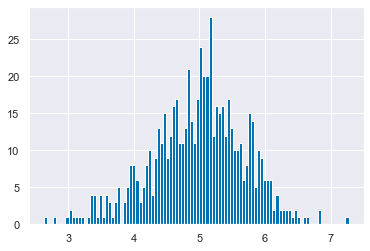

In [161]:
values_by_const["EconomicLeftRight"].hist(bins=100)

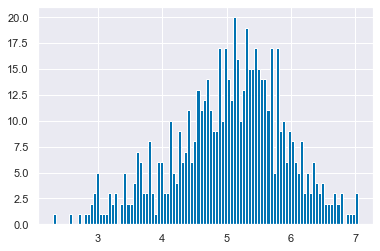

In [162]:
values_by_const["SocialLiberalAuthoritarian"].hist(bins=100)

In [175]:
LDbattleground["EcLR"] = values_by_const["EconomicLeftRight"]
LDbattleground["SocLA"] = values_by_const["SocialLiberalAuthoritarian"]
LDbattleground["N"] = values_by_const["N"]

In [176]:
LDbattleground["EcLR"].sort_index().head(5)

ConstituencyName
Aberavon              2.633548
Aberconwy             4.730709
Aberdeen North        4.989647
Aberdeen South        3.186331
Airdrie and Shotts    4.136138
Name: EcLR, dtype: float64

In [169]:
LDbattleground

,pano,ONSConstID,Country,Region,ConstituencyType,Winner19,Con19,Lab19,LD19,SNP19,...,c11NoAdultsEmployedNoChildren,c11DeprivedNone,c11Deprived1,c11Deprived2,c11Deprived3,c11Deprived4,LD_margin,LD_margin_abs,EconomicLeftRight,SocialLiberalAuthoritarian
ConstituencyName,,,,,,,,,,,,,,,,,,,,,
East Dunbartonshire,209,S14000018,Scotland,Scotland,County,Scottish National Party,14.057816,9.124851,36.814316,37.095284,...,33.984526,50.659591,31.583316,14.608840,2.908132,0.240121,0.280968,0.280968,5.486007,5.075021
"Caithness, Sutherland and Easter Ross",115,S14000009,Scotland,Scotland,County,Liberal Democrat,16.454208,6.154433,37.209522,36.561020,...,33.697632,37.601343,36.072717,20.661452,5.239473,0.425015,-0.648502,0.648502,4.065279,4.202370
Wimbledon,621,E14001040,England,London,Borough,Conservative,38.420052,23.653988,37.235748,NaN,...,19.846579,56.700201,28.943662,11.383300,2.683602,0.289235,1.184303,1.184303,5.990521,4.728156
"Sheffield, Hallam",505,E14000922,England,Yorkshire and The Humber,County,Labour,25.834578,34.647095,33.395447,NaN,...,32.314686,56.154331,29.466853,12.267587,2.009913,0.101317,1.251648,1.251648,5.436823,3.547825
Carshalton and Wallington,133,E14000621,England,London,Borough,Conservative,42.409058,12.385433,41.127949,NaN,...,23.461869,43.265551,33.655323,17.626995,4.920978,0.531153,1.281109,1.281109,5.007736,4.695536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luton South,381,E14000801,England,East of England,Borough,Labour,30.978983,51.794888,NaN,NaN,...,24.201540,34.619536,35.613011,22.388755,6.564294,0.814404,NaN,NaN,5.085720,5.980666
Pontypridd,454,W07000075,Wales,Wales,County,Labour,29.426523,44.498207,NaN,NaN,...,30.885672,42.411749,29.913630,20.867315,6.352885,0.454422,NaN,NaN,5.527311,4.990921
Stroud,546,E14000980,England,South West,County,Conservative,47.902321,42.077961,NaN,NaN,...,28.610869,50.827061,30.979966,15.045187,2.954293,0.193492,NaN,NaN,5.766032,4.532380


In [178]:
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"
LDbattleground.round(2).head(40)[["Region","Winner19","Con19","Lab19","LD19","SNP19",'PC19', 'UKIP19', 'Green19',
       "LD_margin","LD17","EcLR","SocLA","N"]].to_csv(output_folder+"LD_battleground.csv")